In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score
from __future__ import print_function

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

# Set up

In [4]:
data = pd.read_csv('hw_2_stops.csv', dtype={'precinct': str, 'time.period': str})

In [5]:
data = data.dropna()

In [6]:
subset = data.sample(300000)
#subset = data
print(subset.shape)

(300000, 55)


In [7]:
target = subset['arrested']

In [8]:
X = subset[[c for c in subset.columns if 'found' not in c and 'force' not in c and 'additional' not in c and c not in ['arrested', 'frisked', 'searched', 'date', 'summons.issued']]]

In [9]:
X = pd.get_dummies(X)

In [10]:
X_train, X_test, target_train, target_test = train_test_split(
    X, target, test_size=0.25, random_state=1
)

# Question 1

In [11]:
clf = RandomForestClassifier(n_jobs=-1, n_estimators=200)
clf = clf.fit(X_train, target_train)

In [12]:
pred = clf.predict(X_train)
print("Classification accuracy for train set =", 1.0*sum(target_train==pred)/len(pred))

pred = clf.predict(X_test)
print("Classification accuracy for test set =", 1.0*sum(target_test==pred)/len(pred))

Classification accuracy for train set = 0.999995555556
Classification accuracy for test set = 0.94088


In [13]:
print("Test true precision", 1.*sum(target_test&pred)/sum(pred))
print("Test true recall", 1.*sum(target_test&pred)/sum(target_test))

print("Test false precision", 1.*sum((~target_test)&(~pred))/sum(~pred))
print("Test false recall", 1.*sum((~target_test)&(~pred))/sum(~target_test))

Test true precision 0.863247863248
Test true recall 0.0438748913988
Test false precision 0.941122970334
Test false recall 0.999545428718


In [14]:
# Most important features
X.columns[np.argsort(clf.feature_importances_)[::-1]]

Index([u'lon', u'lat', u'suspect.age', u'suspect.weight', u'suspect.height',
       u'observation.period', u'officer.uniform', u'suspect.build_medium',
       u'stopped.bc.furtive', u'suspect.build_thin', 
       ...
       u'suspected.crime_sexual performance by a child',
       u'suspected.crime_offering a false instrument',
       u'suspected.crime_fraudulent make electronic access device',
       u'suspected.crime_reward official misconduct',
       u'suspected.crime_aggravated sexual abuse',
       u'suspected.crime_issue a false certificate',
       u'suspected.crime_course of sexual conduct', u'suspected.crime_incest',
       u'suspected.crime_substitution of children',
       u'suspected.crime_unauthorized use of computer'],
      dtype='object', length=231)

In [15]:
prob = clf.predict_proba(X_test)

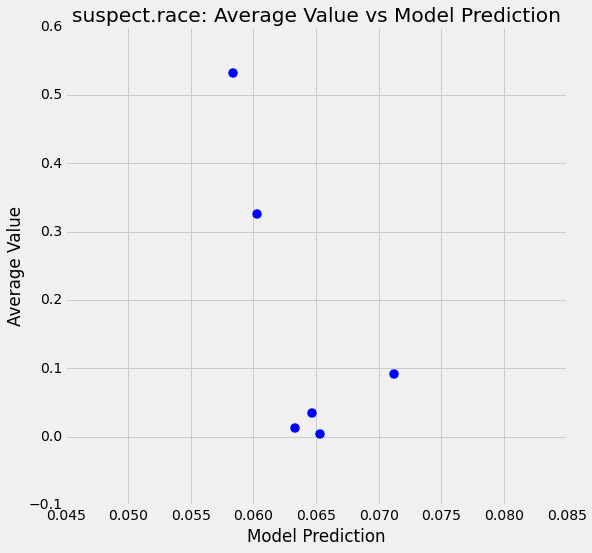

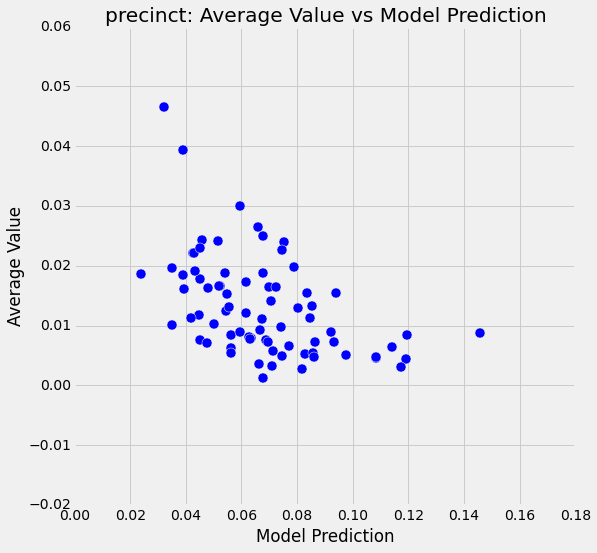

In [16]:
for cat in ['suspect.race', 'precinct']:    
    cols = [c for c in X.columns if cat in c]
    points = []
    for c in cols:
        points.append([prob[np.where(X_test[c] == 1)].mean(axis=0)[1], X[c].mean()])
    points = np.array(points)    
    figure, ax = pl.subplots(figsize=(8,8))
    ax.scatter(points[:,0], points[:,1], s=100)
    ax.set_xlabel('Model Prediction')
    ax.set_ylabel('Average Value')
    ax.set_title('%s: Average Value vs Model Prediction' % cat)

I first randomly sampled the whole dataset to reduce it to 300,000 rows to make it easier to run the classifiers.  Then I randomly separted it into 75% train and 25% test.  I chose to use `arrested` as the target variable.  I trained the random forest on 200 trees.  I then plotted the predicted values vs. the actual average values for race and precinct.  

# Question 2

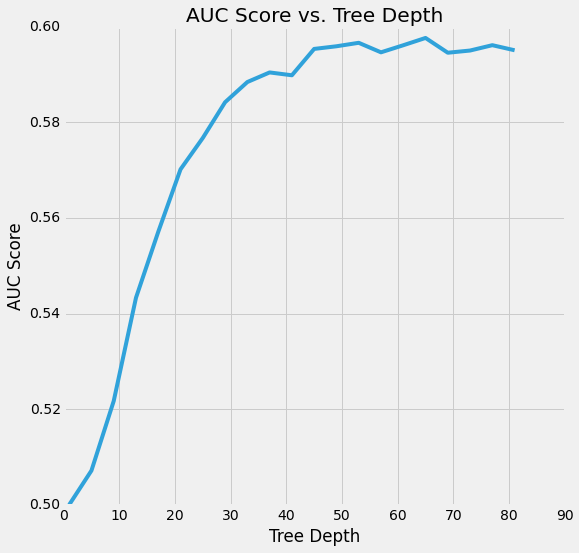

In [17]:
points = []
d = range(1,82,4)
for i in d:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, target_train)
    points.append(roc_auc_score(target_test, clf.predict(X_test)))
    
figure, ax = pl.subplots(figsize=(8,8))
ax.plot(d,points)
ax.set_xlabel('Tree Depth')
ax.set_ylabel('AUC Score')
ax.set_title('AUC Score vs. Tree Depth')

In [18]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, target_train)

In [19]:
export_graphviz(clf, feature_names=X.columns)

I used the same data setup as in the previous question.  I used `max_depth` as the simplicity variable.  I plotted the AUC score vs. the depth for `max_depth` from 1-81.  I then visualzed a decision tree with max_depth=3 by using `export_graphviz` and then using graphviz to convert it to a png show below: <img src="tree.png">